# BIKE SHARING ASSIGNMENT

## READING AND UNDERSTANDING DATA

In [1]:
#Imporing Warnings
import warnings
warnings.simplefilter('ignore')

In [2]:
#Importing Libraries required for regression 

import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
#loading day.csv data

boom_bikes = pd.read_csv('day.csv')
boom_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Knowing the information of this dataset

boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#Shape of boom_bikes data

boom_bikes.shape

(730, 16)

In [6]:
#Inspecting null values

boom_bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
#List of Columns

boom_bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
#numerical description

boom_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
#removing unnecessary columns

boom_bikes = boom_bikes.drop(['dteday','instant','casual','registered'],axis=1)
boom_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
#Value count of season 

boom_bikes["season"].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [11]:
#Renaming values to names for season column

boom_bikes["season"] = boom_bikes["season"].replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
boom_bikes.head(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,Spring,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,1606
6,Spring,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,1510
7,Spring,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,959
8,Spring,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,822
9,Spring,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [12]:
#value count of month column

boom_bikes.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [13]:
#Renaming values for mnth column

boom_bikes["mnth"] = boom_bikes["mnth"].replace({1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"})
boom_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
#Value count of weathersit column

boom_bikes.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [15]:
#renaming the values of weathersit column

boom_bikes["weathersit"] = boom_bikes["weathersit"].replace({1:"Clear",2:"Mist",3:"Light Snow",4:"Heavy Rain"})
boom_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,1,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,2,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
#Value count of weekday

boom_bikes.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [17]:
#Renaming the values of weekday column

boom_bikes["weekday"] = boom_bikes["weekday"].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})
boom_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
boom_bikes.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [19]:
boom_bikes.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

# DATA VISUALIZATION

## PLOTTING CATEGORICAL AND CONTINUOUS VARIABLES

### SEASON

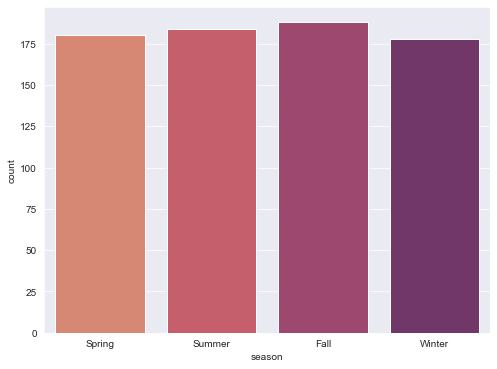

In [20]:
sns.set_style("darkgrid")
plt.figure(figsize=[8,6])
sns.countplot(boom_bikes["season"],palette="flare")
plt.show()

**Inference** : As per the above plot, Summer and Fall season are having high demand for rental bikes.

### MONTH

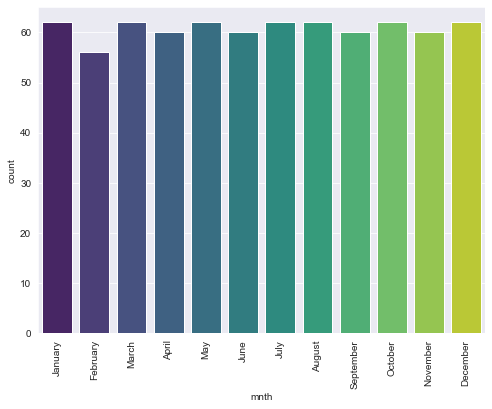

In [21]:
plt.figure(figsize=[8,6])
sns.countplot(boom_bikes["mnth"],palette="viridis")
plt.xticks(rotation=90)
plt.show()

**Inference**: As per the above plot, February month is having least demand while other months have more demnad i.e, atleast 60.

### WEATHER

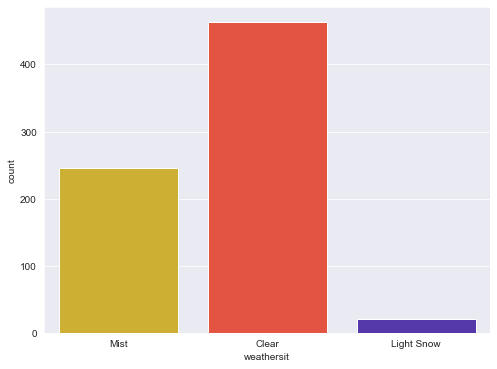

In [22]:
plt.figure(figsize=[8,6])
sns.countplot(boom_bikes["weathersit"],palette="CMRmap_r")
plt.show()

**Inference** : As per the above plot, clear weather is pretty favourable for rental bikes demand.

### WEEKDAY

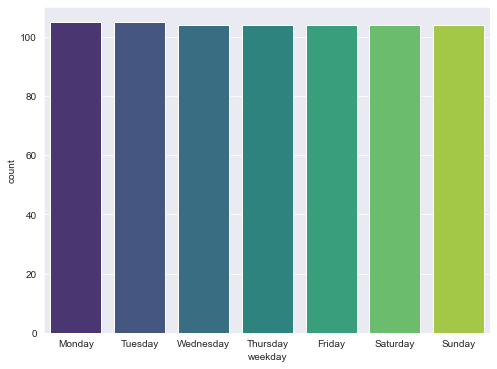

In [23]:
plt.figure(figsize=[8,6])
sns.countplot(boom_bikes["weekday"],palette="viridis")
plt.show()

**Inference:** As per the above plot, monday and tuesday use to have high rental demnad.

### HOLIDAY

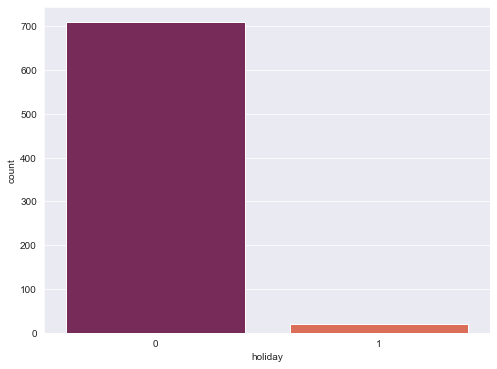

In [24]:
plt.figure(figsize=[8,6])
sns.countplot(boom_bikes["holiday"],palette="rocket")
plt.show()

**Inference** : As per the above plot, bike rentals have high demand during non- holiday.

### WORKING DAY

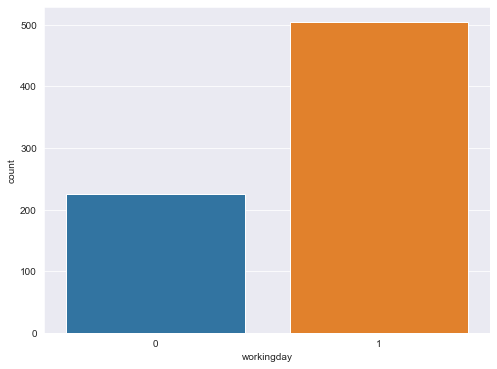

In [25]:
plt.figure(figsize=[8,6])
sns.countplot(boom_bikes["workingday"])
plt.show()

**Inference** : As per the above plot, bike rentals have high demand during working days.

## PLOTTING NUMERICAL VARIABLES

### TEMPERATURE

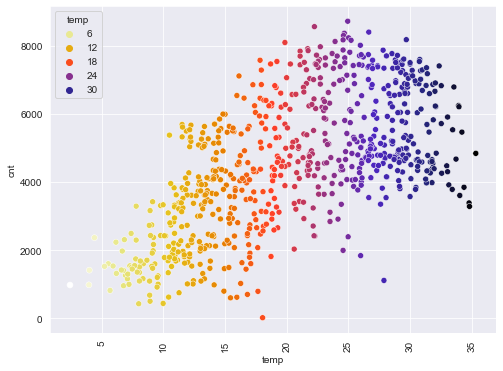

In [26]:
plt.figure(figsize=[8,6])
sns.scatterplot(data=boom_bikes,x="temp",y="cnt",palette="CMRmap_r",hue="temp")
plt.xticks(rotation=90)
plt.show()

**Inference** : As per the above plot, Rental bikes are observed maily in higher temperature.

## HUMIDITY

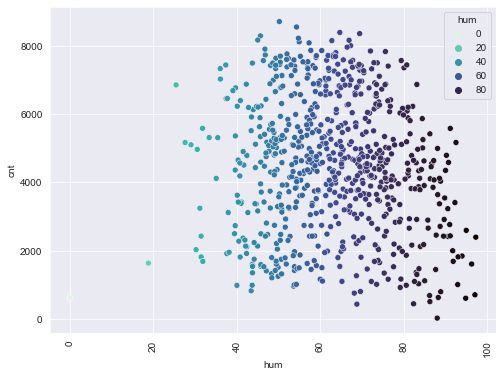

In [27]:
plt.figure(figsize=[8,6])
sns.scatterplot(data=boom_bikes,x="hum",y="cnt",palette="mako_r",hue="hum")
plt.xticks(rotation=90)
plt.show()

**Inference** : As per the above plot, rentals seems to be more at high humidity i.e., 4000-8000 range

### WINDSPEED

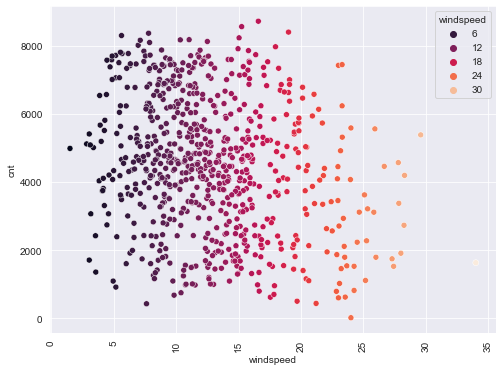

In [28]:
plt.figure(figsize=[8,6])
sns.scatterplot(data=boom_bikes,x="windspeed",y="cnt",palette="rocket",hue="windspeed")
plt.xticks(rotation=90)
plt.show()

**Inference** : Windspeed seems to be high in between 5-20.

## CATEGORICAL COLUMNS USING cnt (COUNT) AS A TARGET

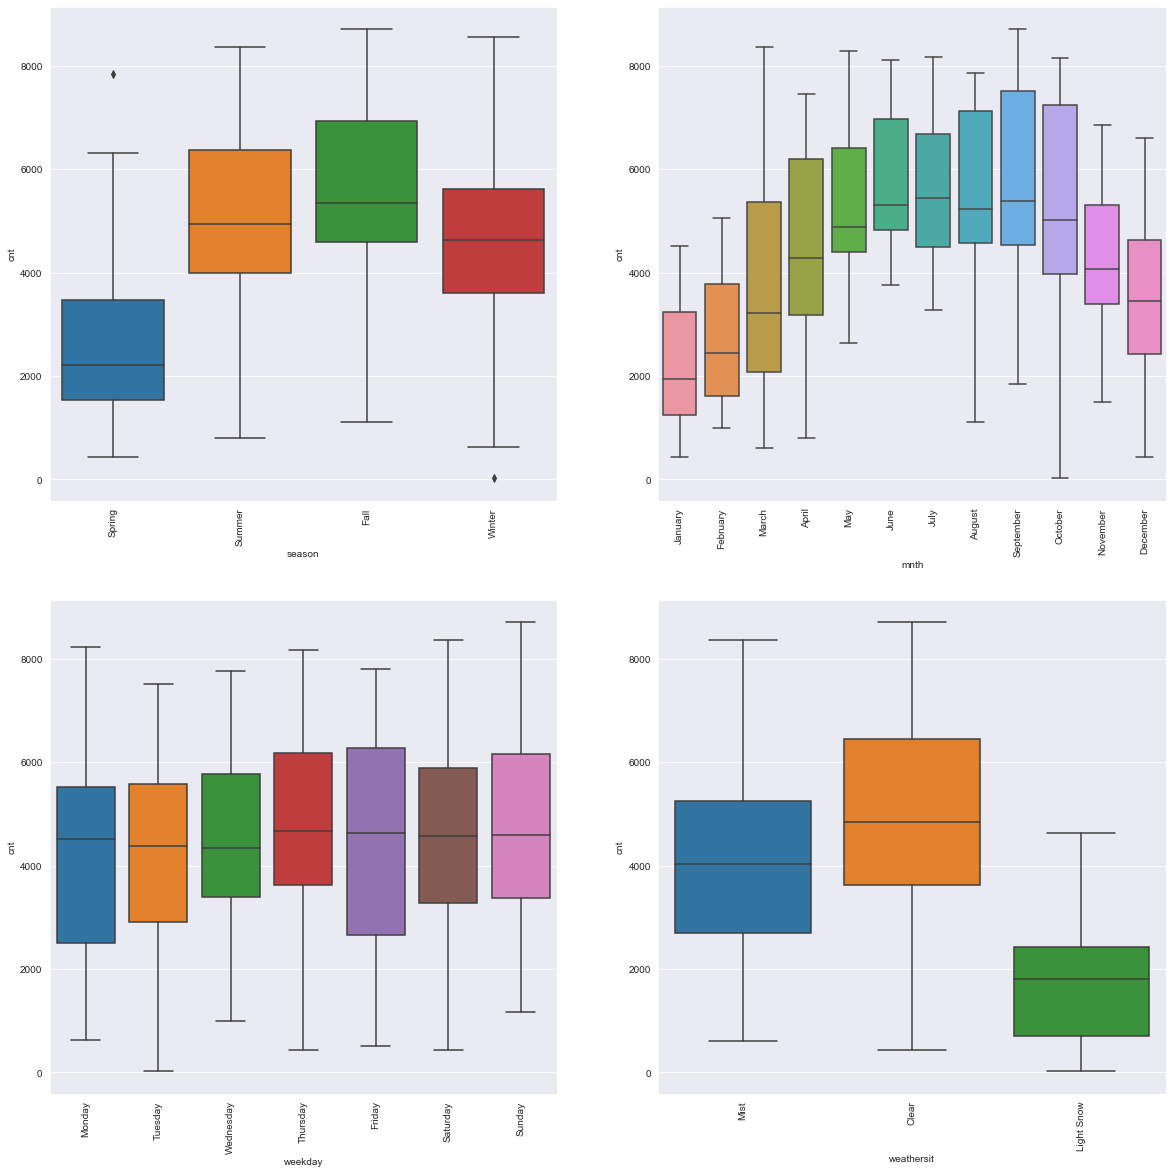

In [29]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.boxplot(x='season', y='cnt',data=boom_bikes,)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.boxplot(x='mnth', y='cnt',data=boom_bikes)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
sns.boxplot(x='weekday', y='cnt',data=boom_bikes)
plt.xticks(rotation=90)

plt.subplot(2,2,4)
sns.boxplot(x='weathersit', y='cnt',data=boom_bikes)
plt.xticks(rotation=90)

plt.show()

**Inference**: As per the above plot,
- Presence of outliers in spring and Winter.
- Rental bikes are more during Fall and Summer.
- Thursday, Saturday and sunday is having good count for bike rentals.
- May to September are having higher demands.
- Clear weather are having higher demand.

## NUMERICAL VARIABLES VISUALIZATION

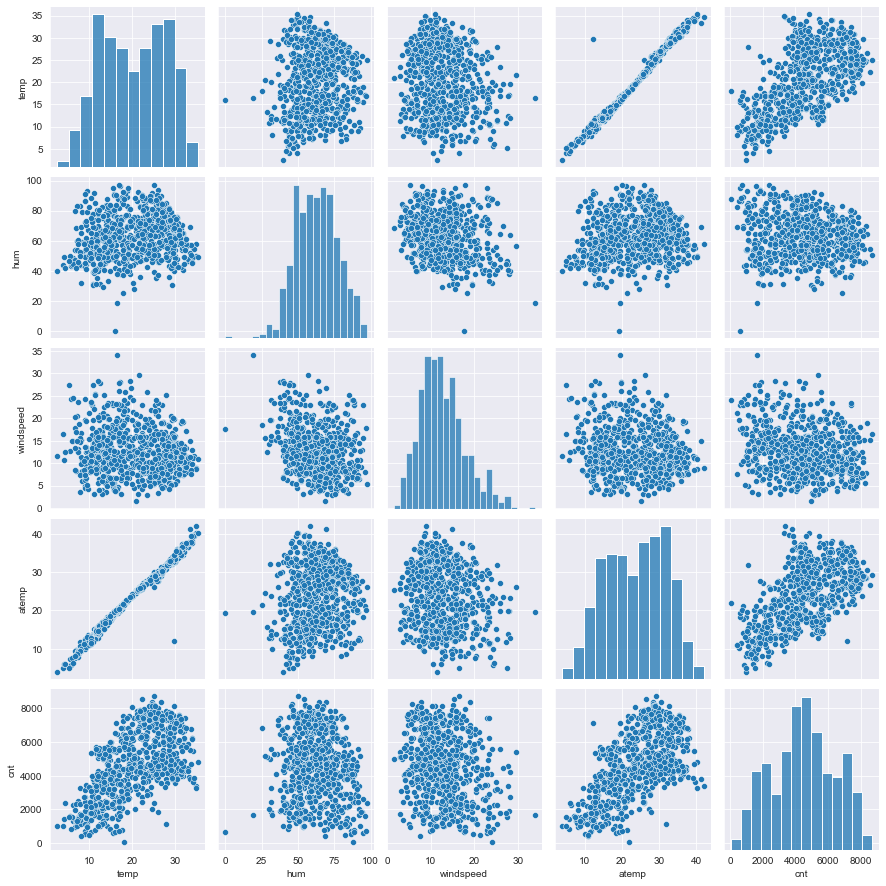

In [30]:
sns.pairplot(boom_bikes,vars=['temp', 'hum','windspeed','atemp','cnt'])
plt.show()

**Inference** : As per the above pairplot, temperature plays a vital role in correlation

## HEATMAP

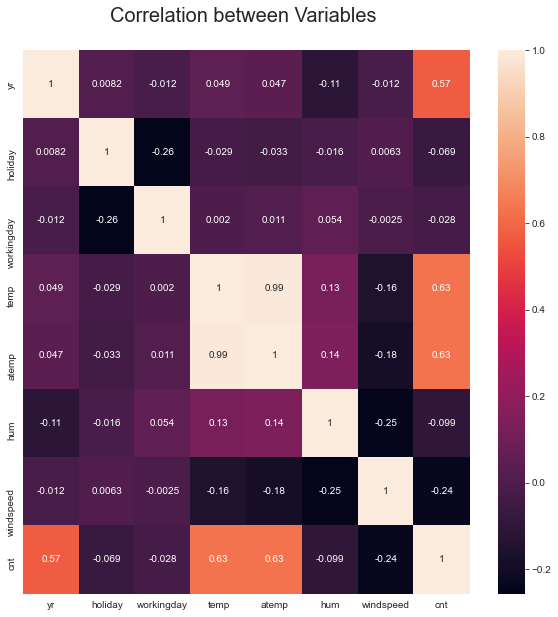

In [31]:
plt.figure(figsize=(10, 10))
sns.heatmap(boom_bikes.corr(), annot = True)
plt.title("Correlation between Variables \n",fontsize=20)
plt.show()

### DROPPING ATEMP FROM DATASET

In [32]:
boom_bikes=boom_bikes.drop('atemp', axis=1)
boom_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Mist,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


# DATA PREPARATION

### Creating biker_categor for showing categorical variables.

In [33]:
bike_categor = boom_bikes.select_dtypes(exclude=['float64','int64'])
bike_categor

,season,mnth,weekday,weathersit
0,Spring,January,Monday,Mist
1,Spring,January,Tuesday,Mist
2,Spring,January,Wednesday,Clear
3,Spring,January,Thursday,Clear
4,Spring,January,Friday,Clear
...,...,...,...,...
725,Spring,December,Friday,Mist
726,Spring,December,Saturday,Mist
727,Spring,December,Sunday,Mist
728,Spring,December,Monday,Clear


### DUMMY VARIABLES

In [34]:
#Dummy Variable for bike_categor

bike_cat_dummies = pd.get_dummies(bike_categor,drop_first = True)
bike_cat_dummies.head()

,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#merging dummies to original dataframe for result

boom_bikes = pd.concat([boom_bikes,bike_cat_dummies],axis=1)
boom_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
0,Spring,0,January,0,Monday,1,Mist,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,Spring,0,January,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,Spring,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,Spring,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#dropping off the columns like season, mnth,weekday and weathersit 

boom_bikes.drop(['season','mnth','weekday','weathersit'],axis = 1,inplace = True)
boom_bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#Checking the shape of dataset

boom_bikes.shape

(730, 29)

# DATA SPLIT INTO TRAINING AND TEST

In [38]:
#Dropping cnt for independent variable X

X = boom_bikes.drop("cnt",axis = 1)
X.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_August,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
0,0,0,1,14.110847,80.5833,10.749882,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#Shape of X

X.shape

(730, 28)

In [40]:
#Adding cnt for dependent variable y

y = boom_bikes.cnt

In [41]:
#Shape of y

y.shape

(730,)

In [42]:
#Splitting of train and test taking X and y. Primarily,  train and test data set use to have same rows.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

In [43]:
X_train.shape

(584, 28)

In [44]:
X_test.shape

(146, 28)

In [45]:
y_train.shape

(584,)

In [46]:
y_test.shape

(146,)

# RESCALING

In [47]:
#Required libraries are imported frommthe first place. So, here we'll be scaling numerical data.

scaler=MinMaxScaler()

In [48]:
#Numerical Variables in var_numer

var_numer = ['temp','hum','windspeed']
X_train[var_numer] = scaler.fit_transform(X_train[var_numer])

In [49]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_August,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
367,1,0,1,0.113228,0.454701,0.695175,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
648,1,0,1,0.468352,0.477458,0.299450,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
44,0,0,1,0.443431,0.387290,0.807474,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
705,1,0,0,0.326094,0.787463,0.189819,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
379,1,0,1,0.133996,0.431945,0.449210,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [50]:
#Numerical description of X_train after scaling

X_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_August,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.726027,0.537414,0.649499,0.319463,0.251712,0.246575,0.250000,0.090753,...,0.092466,0.080479,0.155822,0.119863,0.130137,0.145548,0.159247,0.136986,0.027397,0.342466
std,0.500241,0.163378,0.446377,0.225336,0.144219,0.168114,0.434369,0.431387,0.433384,0.287504,...,0.289931,0.272267,0.362997,0.325080,0.336743,0.352955,0.366220,0.344128,0.163378,0.474941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340113,0.535852,0.199177,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545191,0.653714,0.294764,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.736512,0.752361,0.410413,1.000000,0.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### All the numerical variables are mapped between 0 and 1.

## HEATMAP FOR MULTICOLLINEARITY IN X_train

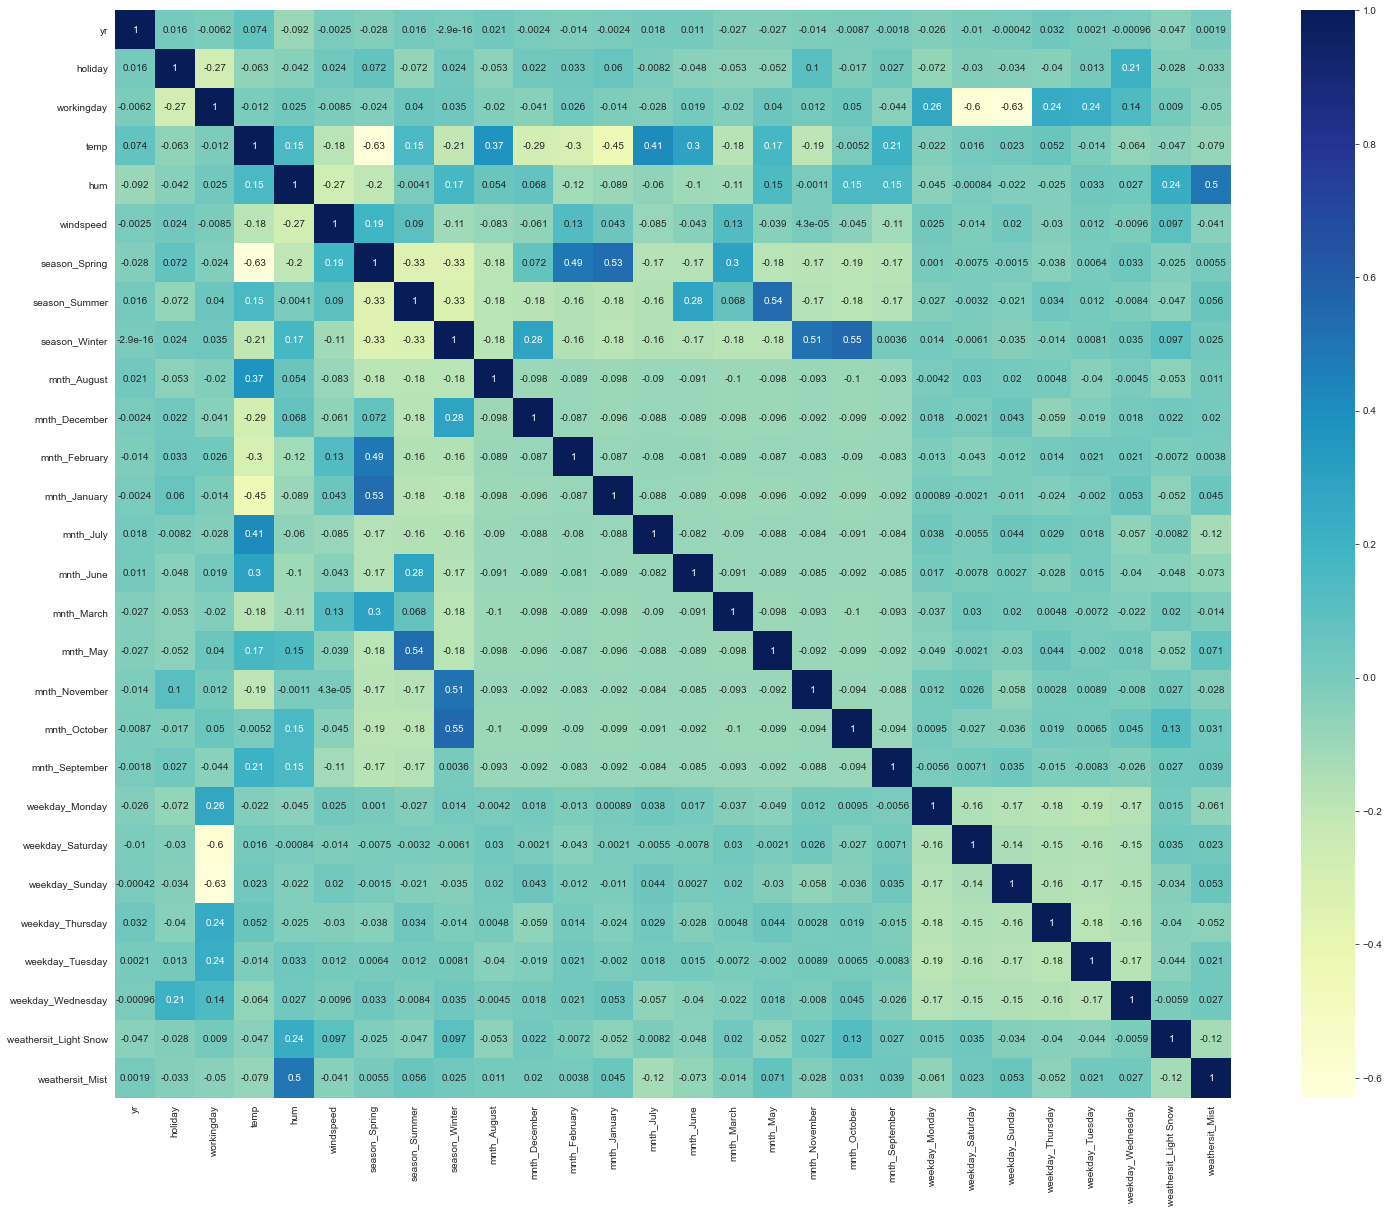

In [51]:
plt.figure(figsize = (25, 20))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# BUILDING A LINEAR MODEL

In [52]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [53]:
coeff_bk = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_bk

,Coefficient
yr,1982.071674
holiday,-1149.657967
workingday,-419.294219
temp,3874.783669
hum,-1307.859124
windspeed,-1540.543662
season_Spring,-489.122127
season_Summer,363.029589
season_Winter,957.980776
mnth_August,168.441166


In [54]:
print(regressor.intercept_)

3348.7621323489147


In [55]:
y_pred = regressor.predict(X_test)

In [56]:
df_b = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

df_b

,Actual,Predicted
184,6043,24911.245950
535,6211,40504.253125
299,2659,-48537.711744
221,4780,48750.345687
152,4968,46950.171612
...,...,...
219,4326,27254.418459
719,3623,-56039.334017
3,1562,-60063.234933
392,4023,-39010.591237


# RFE(RECURSIVE FEATURE ELIMINATION)

RFE to be used for feature selection.

In [57]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            #number of the variable to be equal to 15.
rfe = rfe.fit(X_train, y_train)

In [58]:
#List of selected variables

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_August', False, 10),
 ('mnth_December', True, 1),
 ('mnth_February', False, 2),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 11),
 ('mnth_March', False, 13),
 ('mnth_May', False, 8),
 ('mnth_November', True, 1),
 ('mnth_October', False, 12),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 6),
 ('weekday_Saturday', False, 4),
 ('weekday_Sunday', False, 5),
 ('weekday_Thursday', False, 14),
 ('weekday_Tuesday', False, 7),
 ('weekday_Wednesday', False, 9),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [59]:
(rfe.support_==True).sum()

15

In [60]:
(rfe.support_==False).sum()

13

In [61]:
#Columns where rfe support is True

X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_December', 'mnth_January',
       'mnth_July', 'mnth_November', 'mnth_September', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [62]:
#Columns where rfe support is False

X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_August', 'mnth_February', 'mnth_June', 'mnth_March',
       'mnth_May', 'mnth_October', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

In [63]:
#X_train_rfe with selected columns

X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [64]:
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_December,mnth_January,mnth_July,mnth_November,mnth_September,weathersit_Light Snow,weathersit_Mist
367,1,0,0.113228,0.454701,0.695175,1,0,0,0,1,0,0,0,0,0
648,1,0,0.468352,0.477458,0.299450,0,0,1,0,0,0,0,0,0,0
44,0,0,0.443431,0.387290,0.807474,1,0,0,0,0,0,0,0,0,0
705,1,0,0.326094,0.787463,0.189819,0,0,1,1,0,0,0,0,0,1
379,1,0,0.133996,0.431945,0.449210,1,0,0,0,1,0,0,0,0,0


In [65]:
#Function for Building the model.

def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

In [66]:
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     213.1
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          9.71e-222
Time:                        18:59:16   Log-Likelihood:                -4702.6
No. Observations:                 584   AIC:                             9437.
Df Residuals:                     568   BIC:                             9507.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2787.02

In [67]:
#Function for VIF

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)


In [68]:
#VIF for X_train_new

checkVIF(X_train_new)

,Features,VIF
0,const,86.27
6,season_Spring,5.39
3,temp,4.44
8,season_Winter,3.63
7,season_Summer,2.74
4,hum,1.96
12,mnth_November,1.68
10,mnth_January,1.64
15,weathersit_Mist,1.60
11,mnth_July,1.51


In [69]:
#Dropping mnth_January due to high p-values.

X_train_new = X_train_rfe.drop(["mnth_January"], axis = 1)

In [70]:
X_train_lm1 = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     225.8
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.37e-221
Time:                        18:59:16   Log-Likelihood:                -4705.8
No. Observations:                 584   AIC:                             9442.
Df Residuals:                     569   BIC:                             9507.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2626.38

In [71]:
#VIF for X_train_lm1

checkVIF(X_train_lm1)

,Features,VIF
0,const,82.18
6,season_Spring,5.38
3,temp,3.96
8,season_Winter,3.58
7,season_Summer,2.68
4,hum,1.95
11,mnth_November,1.65
14,weathersit_Mist,1.60
10,mnth_July,1.51
9,mnth_December,1.36


In [72]:
#Dropping season_Spring column

X_train_new1 = X_train_lm1.drop(["season_Spring"], axis = 1)

In [73]:
X_train_lm2 = build_model(X_train_new1, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     236.8
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          7.65e-220
Time:                        18:59:16   Log-Likelihood:                -4712.8
No. Observations:                 584   AIC:                             9454.
Df Residuals:                     570   BIC:                             9515.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1927.60

In [74]:
# VIF for X_train_lm2

checkVIF(X_train_lm2)

,Features,VIF
0,const,47.65
4,hum,1.93
7,season_Winter,1.83
3,temp,1.72
13,weathersit_Mist,1.59
10,mnth_November,1.58
9,mnth_July,1.45
6,season_Summer,1.36
8,mnth_December,1.33
12,weathersit_Light Snow,1.24


In [75]:
#Dropping mnth_december

X_train_new2 = X_train_lm2.drop(["mnth_December"], axis = 1)

In [76]:
X_train_lm3 = build_model(X_train_new2, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     255.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.13e-220
Time:                        18:59:16   Log-Likelihood:                -4714.3
No. Observations:                 584   AIC:                             9455.
Df Residuals:                     571   BIC:                             9511.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1888.07

In [77]:
#VIF for X_train_lm3

checkVIF(X_train_lm3)

,Features,VIF
0,const,47.16
4,hum,1.92
7,season_Winter,1.64
3,temp,1.61
12,weathersit_Mist,1.58
8,mnth_July,1.45
9,mnth_November,1.41
6,season_Summer,1.35
11,weathersit_Light Snow,1.24
10,mnth_September,1.20


In [78]:
#Dropping mnth_November

X_train_new3 = X_train_lm3.drop(["mnth_November"], axis = 1)

In [79]:
X_train_lm4 = build_model(X_train_new3, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     277.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.98e-221
Time:                        18:59:16   Log-Likelihood:                -4715.5
No. Observations:                 584   AIC:                             9455.
Df Residuals:                     572   BIC:                             9508.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1869.00

In [80]:
#VIF for X_train_lm4

checkVIF(X_train_lm4)

,Features,VIF
0,const,47.01
4,hum,1.91
3,temp,1.60
11,weathersit_Mist,1.58
8,mnth_July,1.45
6,season_Summer,1.35
7,season_Winter,1.27
10,weathersit_Light Snow,1.24
9,mnth_September,1.19
5,windspeed,1.18


In [81]:
#Dropping mnth_July

X_train_new4 = X_train_lm4.drop(["mnth_July"], axis = 1)

In [82]:
X_train_lm5 = build_model(X_train_new4, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     301.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          8.52e-221
Time:                        18:59:17   Log-Likelihood:                -4719.3
No. Observations:                 584   AIC:                             9461.
Df Residuals:                     573   BIC:                             9509.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1867.96

In [83]:
#VIF for X_train_lm5

checkVIF(X_train_lm5)

,Features,VIF
0,const,47.01
4,hum,1.90
10,weathersit_Mist,1.58
3,temp,1.26
7,season_Winter,1.23
9,weathersit_Light Snow,1.23
6,season_Summer,1.20
5,windspeed,1.18
8,mnth_September,1.11
1,yr,1.03


# RESIDUAL ANALYSIS

In [84]:
final_model = sm.OLS(y_train,X_train_lm5).fit()

In [85]:
#prediction of y_train_pred

y_train_pred = final_model.predict(X_train_lm5)

## HISTOGRAM FOR ERROR TERMS

In [86]:
%matplotlib inline

<Figure size 432x288 with 0 Axes>

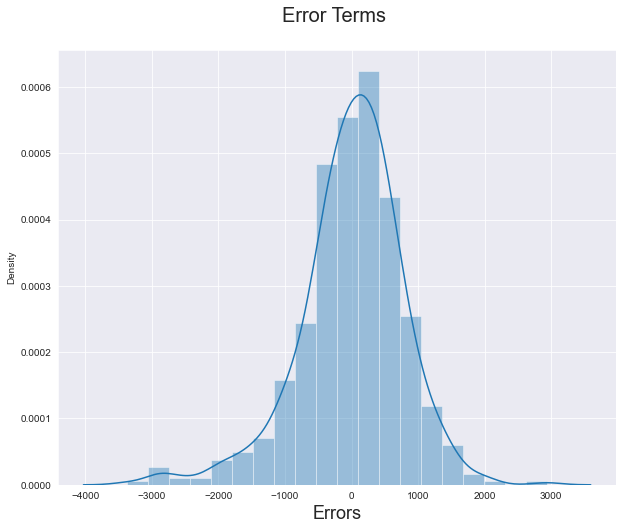

In [87]:
fig = plt.figure()
plt.figure(figsize = (10, 8))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms \n', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

**Inference** : **Error terms are normally distrubuted.**

## PREDICTIONS

In [88]:
#Scaling of test data
var_num_0=['temp','hum','windspeed']
X_test[var_num_0] = scaler.fit_transform(X_test[var_num_0])
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_August,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
184,0,1,0,0.837241,0.534223,0.150577,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.911423,0.470417,0.232972,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.496221,0.777843,0.446910,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.890387,0.236659,0.453268,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.821739,0.070765,0.687792,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [89]:
X_train_lm5.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Summer',
       'season_Winter', 'mnth_September', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [90]:
#Dropping const for further predictions

X_train_new_00 = X_train_lm5.drop(['const'], axis=1)

# Adding a constant variable 

X_test_new_01 = X_test[X_train_new_00.columns]
X_test_new_01 = sm.add_constant(X_test_new_01)
X_test_new_01.head()

,const,yr,holiday,temp,hum,windspeed,season_Summer,season_Winter,mnth_September,weathersit_Light Snow,weathersit_Mist
184,1.0,0,1,0.837241,0.534223,0.150577,0,0,0,0,1
535,1.0,1,0,0.911423,0.470417,0.232972,1,0,0,0,0
299,1.0,0,0,0.496221,0.777843,0.446910,0,1,0,0,1
221,1.0,0,0,0.890387,0.236659,0.453268,0,0,0,0,0
152,1.0,0,0,0.821739,0.070765,0.687792,1,0,0,0,0


In [91]:
# Making predictions and checking shape of it.

y_pred_0 = final_model.predict(X_test_new_01)
y_pred_0.shape

(146,)

In [92]:
#shape of y_test

y_test.shape

(146,)

<Figure size 432x288 with 0 Axes>

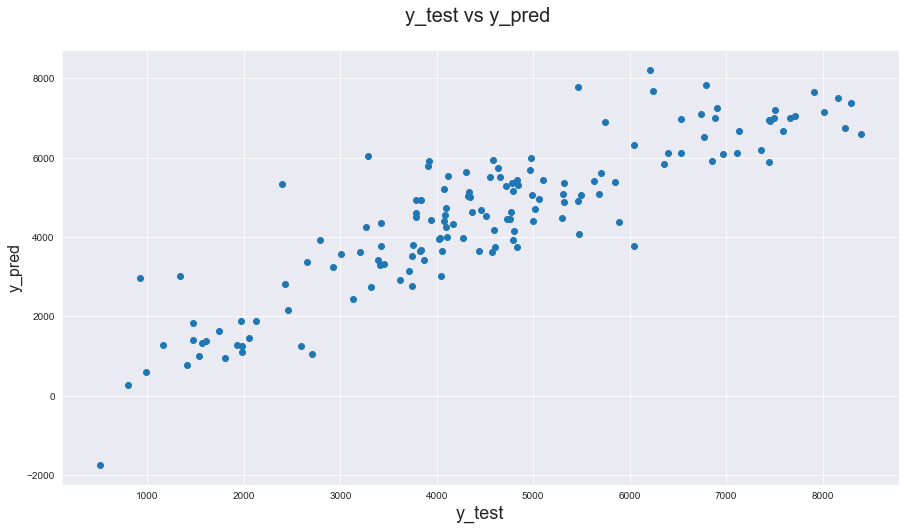

In [93]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.figure(figsize = (15, 8))
plt.scatter(y_test, y_pred_0)
plt.title('y_test vs y_pred \n', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)                          # Y-label
plt.show()

- Predicted data and test data is plotted using scatter plot.
- Model seems to be good for bike demand's prediction.
- Both predicted and test is overlapped.

# R-SQUARE , ADJUSTED R-SQUARE AND ROOT MEAN SQUARED ERROR (RMSE)

In [94]:
from sklearn.metrics import r2_score

In [95]:
#Evaluating R- Square

r_square_test = r2_score(y_test,y_pred_0)
r_square_test

0.7553809583163009

In [96]:
#Adjusted R-Square

adjusted_r_squared_test = 1 - (1-r_square_test)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adjusted_r_squared_test

0.7430398174746008

In [97]:
#Finding MAE,MSE and RMSE

from sklearn import metrics
from sklearn.metrics import mean_squared_error

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_0))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_0))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_0)))

Mean Absolute Error: 709.750213843098
Mean Squared Error: 830830.2367410258
Root Mean Squared Error: 911.4988956334647


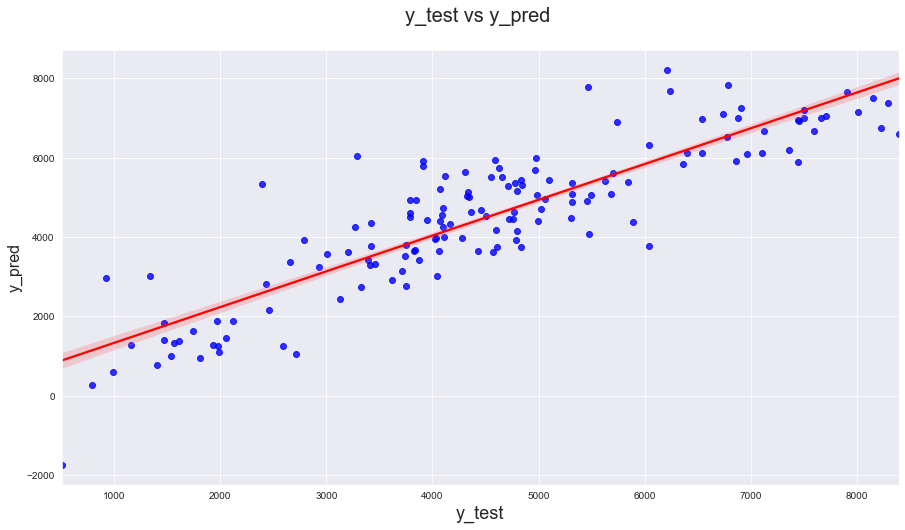

In [98]:
#Regression plot

plt.figure(figsize=(15,8))
sns.regplot(x = y_test, y = y_pred_0, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred \n', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()


# Equation for best fitted line is:

### cnt  =   1955.4 X yr - 923.7 X holiday + 5117.02 X temp - 1491.5 X hum - 1575.1 X windspeed + 802.8 X season_Summer +1269.1 X season_Winter +867.8 X mnth_September - 2085.3 X weathersit_Light Snow - 431.7 X weathersit_Mist

# FINAL RECOMMENDATION : 

### - Demand for Rental Bikes is best during Summer and Winter Season.
### - September mon seems to good for bike rentals.
### - There use to be a decrese in demand rate during light snow and mist. As per business perspective, availing offers to customers might be the good approach.